<a href="https://colab.research.google.com/github/muhammadtarek98/deep-learning-curve-A.I-solutions-internship/blob/main/SVM%2CXGBOOST%2CKNN_data_set_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install opencv-python
!pip install sklearn
!pip install xgboost
!pip install scikit-learn
!pip install torch
!pip install torchvision
!pip install torchaudio
!pip install torchtext
!pip install xgboost

In [ ]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import sklearn
import xgboost
import os
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.datasets import load_digits
from sklearn import metrics

In [ ]:
def image_reader(dir):
  lst=[]
  for image in os.listdir(dir):
    if "png" in image or "jpg" in image or "jpeg" in image or "PNG" in image or "JPG" in image or "JPEG" in image:
          image_dir=dir+image
          img=cv.imread(image_dir,cv.IMREAD_GRAYSCALE)
          img=cv.resize(img,(80,80))
          lst.append(img)
  return np.array(lst)
def data_set_1(dir):
  dataset=[]
  data_set=dict()
  cloudy_lst=image_reader(dir+"cloudy/")
  rain_lst=image_reader(dir+"rain/")
  shine_lst=image_reader(dir+"shine/")
  sunrise_lst=image_reader(dir+"sunrise/")
  data_set[1]=np.array(sunrise_lst)#sunrise
  data_set[2]=np.array(cloudy_lst)#cloudy
  data_set[3]=np.array(shine_lst)#shine
  data_set[4]=np.array(rain_lst)#rain
  dataset.append(sunrise_lst)
  dataset.append(cloudy_lst)
  dataset.append(shine_lst)
  dataset.append(rain_lst)
  dataset=np.array(dataset)
  #del cloudy_lst,rain_lst,shine_lst,sunrise_lst
  return data_set,dataset

In [ ]:
training_data_set_dict,training_data_set_lst=data_set_1("/content/drive/MyDrive/task_3_dataset/data_set_1/")
print(training_data_set_dict.keys())

dict_keys([1, 2, 3, 4])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
for class_image in training_data_set_dict.keys():
    print(np.array(training_data_set_dict[class_image]).shape)

(357, 150, 150)
(300, 150, 150)
(252, 150, 150)
(214, 150, 150)


In [ ]:
def show(class_name,class_num):
  print(class_name)
  for i in range(0,10):
    plt.imshow(training_data_set_dict[class_num][i],cmap="gray")
    plt.show()
    print(training_data_set_dict[class_num][i].shape)

sunrise


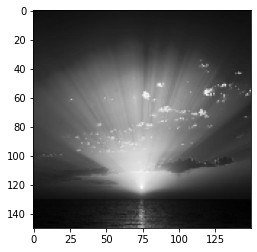

(150, 150)


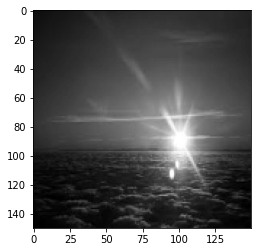

(150, 150)


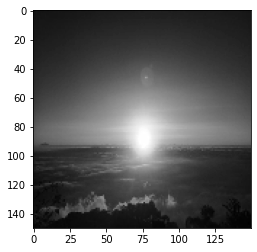

(150, 150)


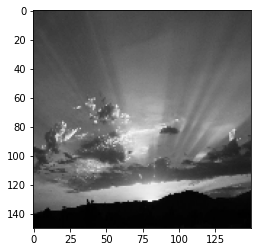

(150, 150)


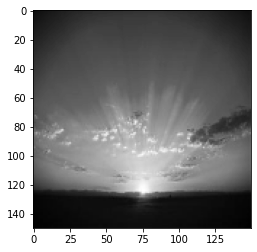

(150, 150)


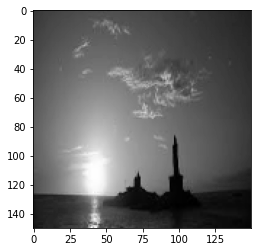

(150, 150)


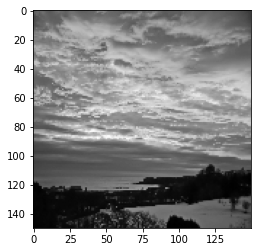

(150, 150)


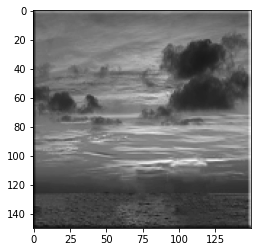

(150, 150)


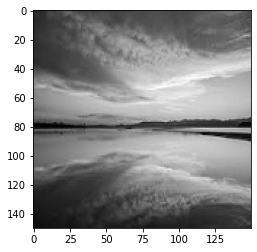

(150, 150)


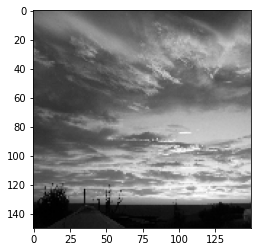

(150, 150)


In [ ]:
show("sunrise",1)

cloudy


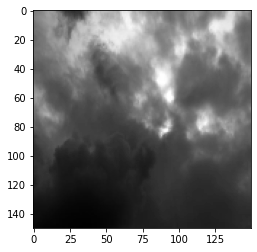

(150, 150)


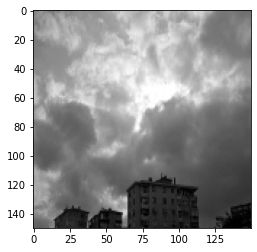

(150, 150)


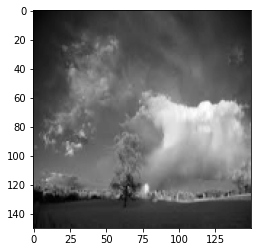

(150, 150)


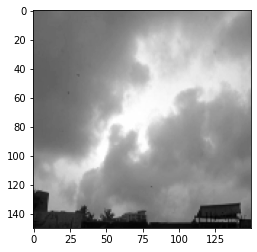

(150, 150)


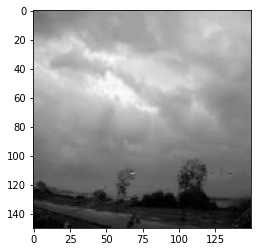

(150, 150)


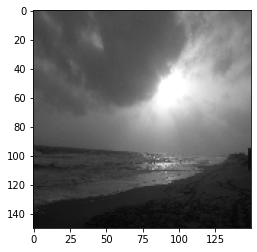

(150, 150)


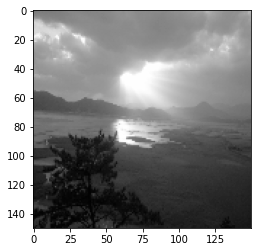

(150, 150)


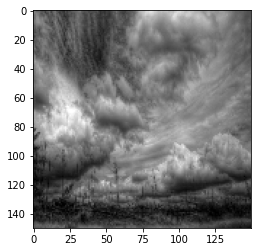

(150, 150)


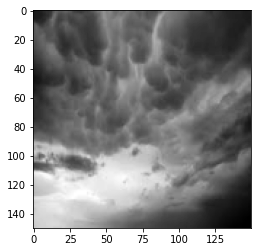

(150, 150)


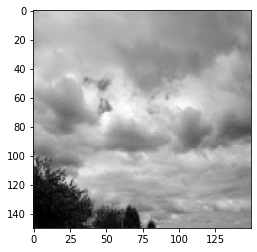

(150, 150)


In [ ]:
show("cloudy",2)

shine


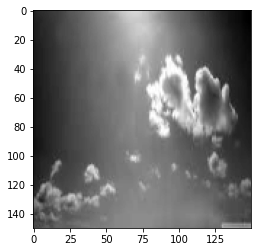

(150, 150)


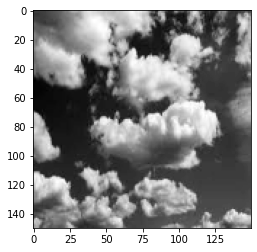

(150, 150)


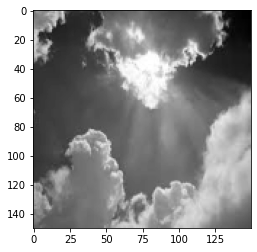

(150, 150)


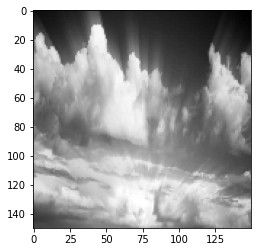

(150, 150)


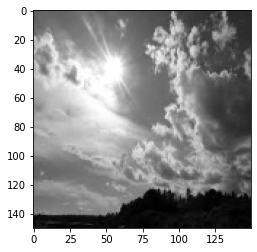

(150, 150)


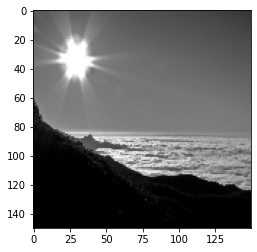

(150, 150)


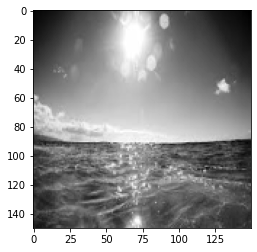

(150, 150)


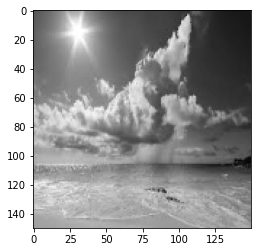

(150, 150)


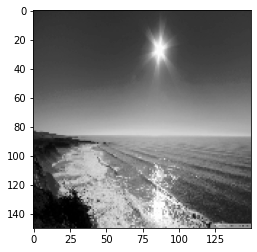

(150, 150)


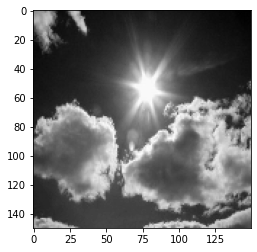

(150, 150)


In [ ]:
show("shine",3)

rain


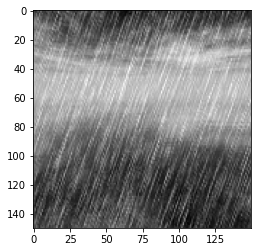

(150, 150)


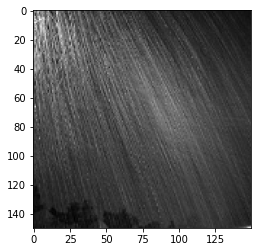

(150, 150)


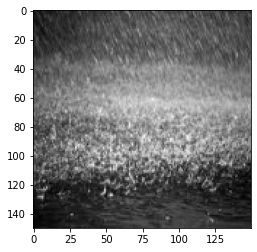

(150, 150)


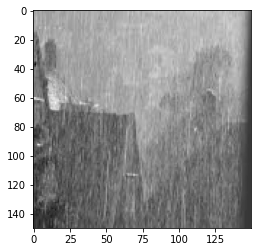

(150, 150)


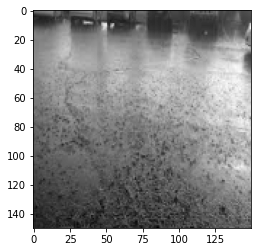

(150, 150)


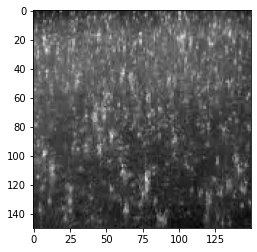

(150, 150)


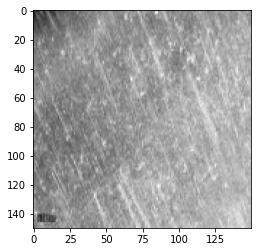

(150, 150)


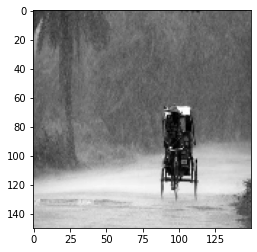

(150, 150)


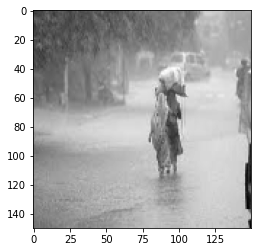

(150, 150)


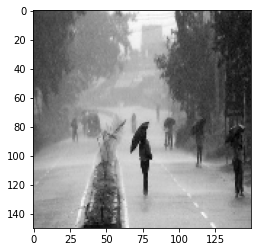

(150, 150)


In [ ]:
show("rain",4)

In [ ]:
training_input_images=[]
training_targets=[]
class_label=1
for images in training_data_set_lst:
  for image in images:
    training_input_images.append(image)
    training_targets.append(class_label)
  class_label+=1
print(len(training_targets))
print(len(training_input_images))
training_input_images=np.array(training_input_images)
print(training_input_images.shape)
counter_1=counter_2=counter_3=counter_4=0
for i in training_targets:
  if i ==1:
    counter_1+=1
  elif i==2:
    counter_2+=1
  elif i==3:
    counter_3+=1
  elif i==4:
    counter_4+=1
print(counter_1)
print(counter_2)
print(counter_3)
print(counter_4)
print(counter_1+counter_2+counter_3+counter_4)

1123
1123
(1123, 150, 150)
357
300
252
214
1123


In [ ]:
training_set=np.array(training_input_images).reshape((len(training_input_images),-1))
X_train, X_test, y_train, y_test = train_test_split(
    training_set, training_targets, test_size=0.3, shuffle=True
)

In [ ]:
model_knn=KNeighborsClassifier(n_neighbors=7)

In [ ]:
model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
score=model_knn.score(X_test,y_test)
print(score)

0.5727002967359051


In [ ]:
score=model_knn.score(X_test,y_test)
print(score)
predicted = model_knn.predict(X_test)

0.5727002967359051


In [ ]:
print(metrics.classification_report(y_true=y_test,y_pred=predicted))

              precision    recall  f1-score   support

           1       0.64      0.81      0.72       108
           2       0.41      0.23      0.30        94
           3       0.70      0.45      0.55        73
           4       0.51      0.81      0.62        62

    accuracy                           0.57       337
   macro avg       0.56      0.58      0.55       337
weighted avg       0.56      0.57      0.55       337



In [ ]:
model_svm=sklearn.svm.LinearSVC()

In [ ]:
model_svm.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

In [ ]:
score=model_svm.score(X_test,y_test)
print(score)
predicted_svm = model_svm.predict(X_test)

0.5281899109792285


In [ ]:
print(metrics.classification_report(y_true=y_test,y_pred=predicted_svm))

              precision    recall  f1-score   support

           1       0.62      0.65      0.64       108
           2       0.44      0.47      0.45        94
           3       0.44      0.53      0.48        73
           4       0.69      0.40      0.51        62

    accuracy                           0.53       337
   macro avg       0.55      0.51      0.52       337
weighted avg       0.55      0.53      0.53       337



In [ ]:
print(metrics.confusion_matrix(y_true=y_test,y_pred=predicted_svm))

[[70 26 10  2]
 [23 44 22  5]
 [16 14 39  4]
 [ 3 16 18 25]]
